# Table of Contents
 <p><div class="lev1 toc-item"><a href="#RNA-seq-Analysis-for-Angeles-and-Leighton,-2016." data-toc-modified-id="RNA-seq-Analysis-for-Angeles-and-Leighton,-2016.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RNA-seq Analysis for Angeles and Leighton, 2016.</a></div><div class="lev1 toc-item"><a href="#Importing-Data-and-a-Brief-Reminder-of-Sleuth-Results" data-toc-modified-id="Importing-Data-and-a-Brief-Reminder-of-Sleuth-Results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Data and a Brief Reminder of Sleuth Results</a></div><div class="lev1 toc-item"><a href="#Run-TEA" data-toc-modified-id="Run-TEA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Run TEA</a></div><div class="lev1 toc-item"><a href="#Fig-1b" data-toc-modified-id="Fig-1b-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fig 1b</a></div><div class="lev1 toc-item"><a href="#Figure-out-aging-set-quality-via-a-hypergeometric-test" data-toc-modified-id="Figure-out-aging-set-quality-via-a-hypergeometric-test-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Figure out aging set quality via a hypergeometric test</a></div><div class="lev1 toc-item"><a href="#Volcano-Plots" data-toc-modified-id="Volcano-Plots-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Volcano Plots</a></div><div class="lev2 toc-item"><a href="#Fig-1a" data-toc-modified-id="Fig-1a-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Fig 1a</a></div><div class="lev1 toc-item"><a href="#Identifying-Transcription-Factors-Involved" data-toc-modified-id="Identifying-Transcription-Factors-Involved-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Identifying Transcription Factors Involved</a></div><div class="lev2 toc-item"><a href="#TEA-for-TFs" data-toc-modified-id="TEA-for-TFs-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>TEA for TFs</a></div><div class="lev1 toc-item"><a href="#Overlap-between-datasets" data-toc-modified-id="Overlap-between-datasets-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Overlap between datasets</a></div><div class="lev1 toc-item"><a href="#Interactive-Volcano-Plots" data-toc-modified-id="Interactive-Volcano-Plots-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Interactive Volcano Plots</a></div><div class="lev2 toc-item"><a href="#Interactive-Aging-Volcano-Plot,-Figure-2a" data-toc-modified-id="Interactive-Aging-Volcano-Plot,-Figure-2a-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Interactive Aging Volcano Plot, Figure 2a</a></div><div class="lev2 toc-item"><a href="#Interactive-Genotype-Volcano-Plot" data-toc-modified-id="Interactive-Genotype-Volcano-Plot-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Interactive Genotype Volcano Plot</a></div><div class="lev2 toc-item"><a href="#Interactive-Interaction-Volcano-Plot" data-toc-modified-id="Interactive-Interaction-Volcano-Plot-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Interactive Interaction Volcano Plot</a></div><div class="lev1 toc-item"><a href="#Interactive-Cross-Plots" data-toc-modified-id="Interactive-Cross-Plots-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Interactive Cross Plots</a></div><div class="lev2 toc-item"><a href="#Aging-vs.-Genotype,-Interactive-Figure-3a" data-toc-modified-id="Aging-vs.-Genotype,-Interactive-Figure-3a-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Aging vs. Genotype, Interactive Figure 3a</a></div><div class="lev2 toc-item"><a href="#Aging-vs.-Aging::Genotype,-Interactive-Figure-3b" data-toc-modified-id="Aging-vs.-Aging::Genotype,-Interactive-Figure-3b-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Aging vs. Aging::Genotype, Interactive Figure 3b</a></div><div class="lev2 toc-item"><a href="#Genotype-vs.-Aging::Genotype,-Interactive-Figure" data-toc-modified-id="Genotype-vs.-Aging::Genotype,-Interactive-Figure-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Genotype vs. Aging::Genotype, Interactive Figure</a></div><div class="lev1 toc-item"><a href="#Figure-3a,-3b" data-toc-modified-id="Figure-3a,-3b-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Figure 3a, 3b</a></div>

# RNA-seq Analysis for Angeles and Leighton, 2016. 

We used Kallisto to map reads and estimate TPM counts and Sleuth to analyze the RNA-seq data. 

However, because I like to make my own plots, and because I wanted to carry out extensive analysis (I mainly write in python), the results were transferred from R into this python pipeline.

This pipeline is built using Python > 3.5

Requirements:

pandas
numpy
matplotlib.pyplot

tissue_enrichment analysis (`pip install tissue_enrichment_analysis` to get it; publication forthcoming)

pyrnaseq_graphics (found in our [github repository](https://github.com/WormLabCaltech/Angeles_And_Leighton_2016), publication may be forthcoming)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tissue_enrichment_analysis as tea
import pyrnaseq_graphics as rsq
import scipy.stats as stats
import matplotlib as mpl

from IPython.core.display import HTML


# bokeh
import bokeh.charts
import bokeh.charts.utils
import bokeh.io
import bokeh.models
import bokeh.palettes
import bokeh.plotting
from bokeh.plotting import figure
from bokeh.resources import CDN
from bokeh.embed import file_html

# Display graphics in this notebook
bokeh.io.output_notebook()


Loading BokehJS ...

In [2]:
%matplotlib inline

# This enables high res graphics inline (only use with static plots (non-Bokeh))
# SVG is preferred, but there is a bug in Jupyter with vertical lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png')
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 22, 
      'axes.titlesize': 20, 
      'legend.fontsize': 'x-large',
      'axes.facecolor': 'DFDFE5'}
sns.set_context('paper', rc=rc)
sns.set_style('dark', rc=rc)

import matplotlib.cm as cm
from matplotlib import rc
rc('text', usetex=True)
import matplotlib.patheffects as path_effects


mag = 2  # value of beta from regression
qval = .1  # qvalue from regression
qvalEn = 0.05  # q value for enrichment analysis (tissues)


# Importing Data and a Brief Reminder of Sleuth Results

First, I load all my data. Briefly, remember that Sleuth calculates log-linear models of the form 

$$
log(y_i) = \beta_0 + \sum\limits_{k\epsilon K}\beta_k \cdot x_k + \sum\limits_{k\epsilon K}\sum\limits_{l\epsilon L} \beta_{k, l} \cdot x_k \cdot x_l + ...
$$

and these linear models can be extended to have interactions, etc.. 

For our specific model, we chose a linear model with interactions, of the form:

$$
log(y_i) = \beta_0 + \beta_{\mathrm{Old Adult}} \cdot x_{\mathrm{Old Adult}} + \beta_{\mathrm{fog-2}} \cdot x_{\mathrm{fog-2}} + \beta_{\mathrm{fog-2, Old Adult}} \cdot x_{\mathrm{fog-2}} \cdot x_{\mathrm{Old Adult}} 
$$

In [17]:
output_aging = '../output/raw_aging_plots/'
output_genotype = '../output/raw_genotype_plots/'
output_interaction = '../output/raw_interaction_plots/'
output_sperm = '../output/raw_sperm_plots/'

# gene_lists from sleuth
# tpm vals for PCA
path = '../input/sleuth_results/'
# pos beta means high old adults
dfBetaA = pd.read_csv(path + "si2_aging_analysis.csv", comment='#')
dfBetaA.dropna(inplace=True)
# pos beta means high in fog2
dfBetaG = pd.read_csv(path + "si3_genotype_analysis.csv", comment='#')
dfBetaG.dropna(inplace=True)
# pos beta means high in fog2-aged
dfBetaAG = pd.read_csv(path + "si4_interaction_analysis.csv", comment='#')
dfBetaAG.dropna(inplace=True)
# likelihood ratio test results
dfLRT = pd.read_csv(path + "lrt.csv")
dfLRT.dropna(inplace=True)

# sort by target_id
dfBetaA.sort_values('target_id', inplace=True)
dfBetaA.reset_index(inplace=True)
dfBetaG.sort_values('target_id', inplace=True)
dfBetaG.reset_index(inplace=True)
dfBetaAG.sort_values('target_id', inplace=True)
dfBetaAG.reset_index(inplace=True)
dfLRT.sort_values('target_id', inplace=True)
dfLRT.reset_index(inplace=True)

# gold standard datasets
path = '../input/gold_standards/'
dfDaf12 = pd.read_csv(path + 'daf12genes.csv')
dfDaf16 = pd.read_csv(path + 'daf16genes.csv')
dfLund = pd.read_csv(path + 'lund_data.csv', header=None, names=['gene'])
dfEckley = pd.read_csv(path + 'eckley_data.csv', header=None, names=['gene'])
dfMurphyUp = pd.read_csv(path + 'murphy_data_lifespan_extension.csv')
dfMurphyDown = pd.read_csv(path + 'murphy_data_lifespan_decrease.csv')
dfHalaschek = pd.read_csv(path + 'Halaschek-Wiener_data.csv')

# gpcrs
dfGPCR = pd.read_csv(path + 'all_gpcrs.csv')
dfICh = pd.read_csv(path + 'select_ion_transport_genes.csv')
dfAxon = pd.read_csv(path + 'axonogenesis_genes.csv')
dfNP = pd.read_csv(path + 'neuropeptides.csv')

# gpcr is going to go into a gold standard fxn so add an 'origin' colmn
dfGPCR['origin'] = 'gpcrs'
dfICh['origin'] = 'select ion transport genes'
dfAxon['origin'] = 'axonogenesis genes'
dfNP['origin'] = 'neuropeptide genes'
frames = [dfGPCR, dfICh, dfAxon, dfNP]
dfTargets = pd.concat(frames)

dfTargets.columns = ['gene', 'effect']

# place all the gold standards in a single dataframe:
dfDaf12['origin'] = 'daf-12'
dfDaf16['origin'] = 'daf-16'
dfEckley['origin'] = 'Eckley'
dfLund['origin'] = 'Lund'
dfMurphyUp['origin'] = 'MurphyExt'
dfMurphyDown['origin'] = 'MurphyDec'
dfHalaschek['origin'] = 'Halaschek'
frames = [dfDaf12, dfDaf16, dfEckley, dfLund,
          dfMurphyDown, dfMurphyUp, dfHalaschek]
dfGoldStandard = pd.concat(frames)

# from wormbase
dfLifespanGenes = pd.read_csv(path + 'lifespan gene list complete.csv')

tissue_df = tea.fetch_dictionary()
phenotype_df = pd.read_csv('../input/phenotypes_dict.csv')

tf = pd.read_csv('../input/tf_list.csv')
# go = pd.read_csv('../input/go.csv')

In [18]:
# sterility = pd.read_csv('~/Downloads/sterility genes.txt', header=None)
# sperm = pd.read_csv('~/Downloads/sperm genes by phenotype.txt', header=None)

path = '../input/sleuth_results/'
df_TPM = pd.read_csv(path + 'tpm_table.csv')

xticksize = 15.5
xlabelsize = 23
ylabelsize_volcano = 23
volcano_legendsize = 10

# Run TEA

Run tissue enrichment analysis to identify tissues most impacted by aging and genotype. We will run the analysis three times:
Once for genes that are differentially affected by aging, once for genes that are differentially affected by genotype, and once for genes that have significant interaction terms. 

In [39]:
print('Aging Results:')
resA = tea.enrichment_analysis(dfBetaA[(dfBetaA.qval < qval)].ens_gene, tissue_df,
                                 show=False)
print(resA.head())
print('\n-------------\nGenotype Results:')
resG = tea.enrichment_analysis(dfBetaG[(dfBetaG.qval < qval)].ens_gene, tissue_df,
                                 show=False)
print(resG.head())

print('\n-------------\nAging::Genotype Results:')
resAG = tea.enrichment_analysis(dfBetaAG[(dfBetaAG.qval < qval)].ens_gene, tissue_df,
                                 show=False)
print(resAG.head())


Aging Results:
                                 Tissue     Expected  Observed  \
87        labial sensillum WBbt:0005107  1050.711689      1264   
33                     PVD WBbt:0006831  1014.577030      1224   
82   anal depressor muscle WBbt:0004292   162.781377       227   
186                  Psub1 WBbt:0006874    81.741510       120   
269   cephalic sheath cell WBbt:0008406   106.299046       147   

     Enrichment Fold Change       P value       Q value  
87                 1.202994  6.131072e-17  1.673783e-14  
33                 1.206414  6.944981e-17  1.673783e-14  
82                 1.394508  3.144431e-10  2.861433e-08  
186                1.468042  9.786954e-08  6.679596e-06  
269                1.382891  5.634984e-07  3.076701e-05  

-------------
Genotype Results:
                                 Tissue    Expected  Observed  \
107                     AB WBbt:0004015   15.708429        34   
272         uterine muscle WBbt:0005342   18.188708        34   
269   cephal

Make relevant plots using the inbuilt plotter in tea:

# Fig 1b

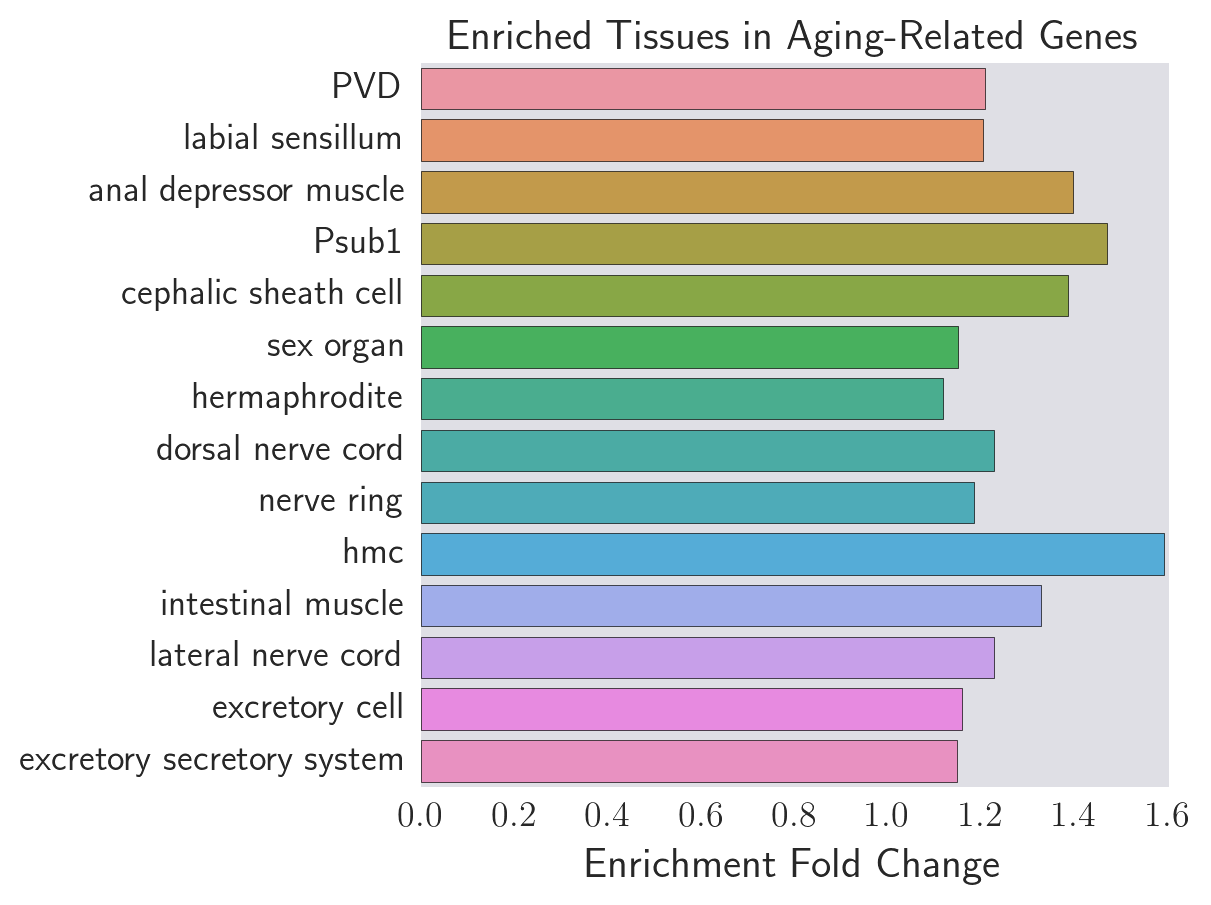

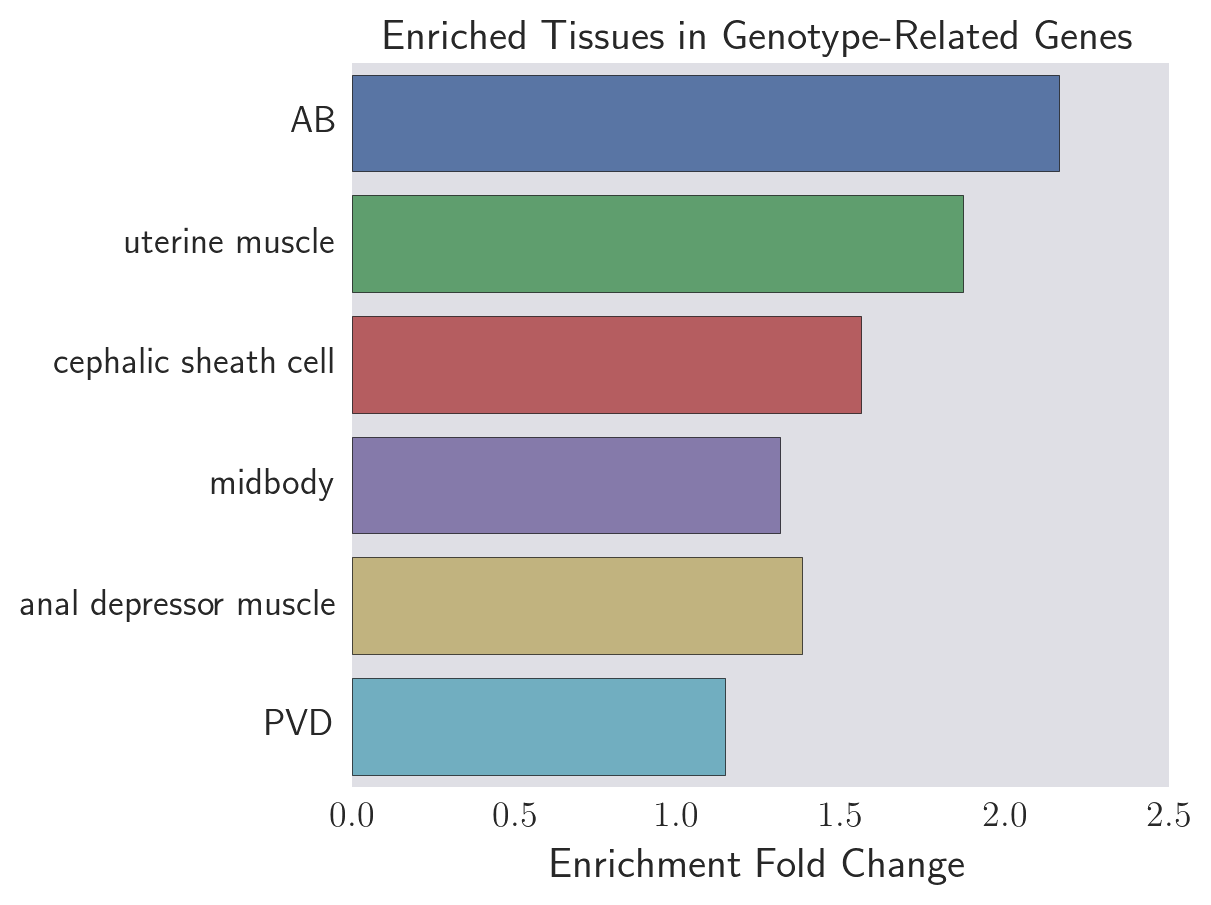

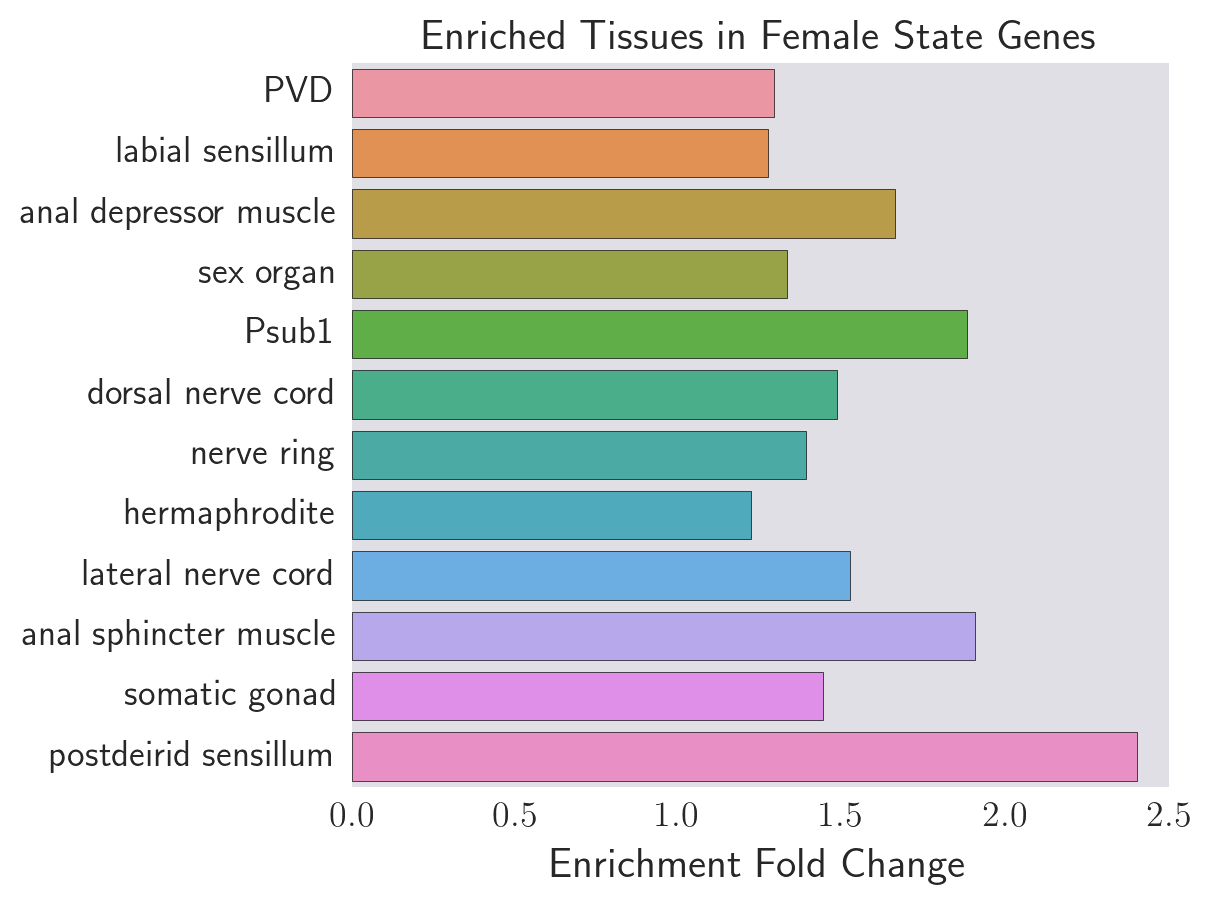

In [20]:
def fix_fonts(n, ax):
    if type(n) != int:
        raise ValueError('n must be an integer')
        
    ax.xaxis.label.set_fontsize(n)
    ax.yaxis.label.set_fontsize(n)
    ax.title.set_fontsize(n)


fig, ax = plt.subplots()
tea.plot_enrichment_results(resA, save=False)
plt.title('Enriched Tissues in Aging-Related Genes')
plt.ylabel('')
fix_fonts(15, ax)
plt.savefig(output_aging + 'tea_aging.svg', transparent=True)

fig, ax = plt.subplots()
tea.plot_enrichment_results(resG, save=False)
plt.title('Enriched Tissues in Genotype-Related Genes')
plt.ylabel('')
fix_fonts(15, ax)
plt.savefig(output_genotype + 'tea_genotype.svg', transparent=True)


fig, ax = plt.subplots()
tea.plot_enrichment_results(resAG, save=False)
plt.title('Enriched Tissues in Female State Genes')
plt.ylabel('')
fix_fonts(15, ax)
plt.savefig(output_interaction + 'tea_interaction.svg', transparent=True)

TEA suggests that the muscle is heavily impacted by aging, which makes sense. Interestingly, the pharynx is most overrepresented, but neither of us have noticed pumping differences between old and young animals. Stratifying results by effect sign shows that upregulated genes are responsible for the enrichment of these terms, and genes that are downregulated have no statistically significant enrichment. 

Genotype TEA also yields sensible results. The terms 'uterine muscle', 'midbody', 'sex organ' and 'somatic gonad' all turn up, which reflect the nature of the genetic change caused by the fog-2 mutation, namely, loss of sperm. Interestingly, stratifying the analysis by effect sign (b > 0 or b < 0), shows that genes upregulated in fog-2 relative to N2 are mainly associated with germline/gonad/hypodermis, whereas downregulated genes are associated with muscles. 

Interestingly, running TEA on Life-History genes also suggests that certain muscles experience significantly different stresses between worms of different genotype. Stratified analyses show that genes with significantly negative interaction terms are mainly neuronally associated, whereas genes with significantly positive interactions terms show excretory cell and pharynx. 

# Figure out aging set quality via a hypergeometric test

In [7]:
sig = (dfBetaA.qval < 0.1)
gold = (dfBetaA.ens_gene.isin(dfGoldStandard.gene))
found = dfBetaA[sig & gold].shape[0]
pval = stats.hypergeom.sf(found, dfBetaA.shape[0], dfGoldStandard.shape[0], dfBetaA[sig].shape[0])
s = 'There are {0} gold standard genes in the aging set. '
s += 'This number is enriched above background at a p-value of {1:.2g}'
print(s.format(found, pval))

There are 512 gold standard genes in the aging set. This number is enriched above background at a p-value of 8.1e-39


# Volcano Plots

## Fig 1a

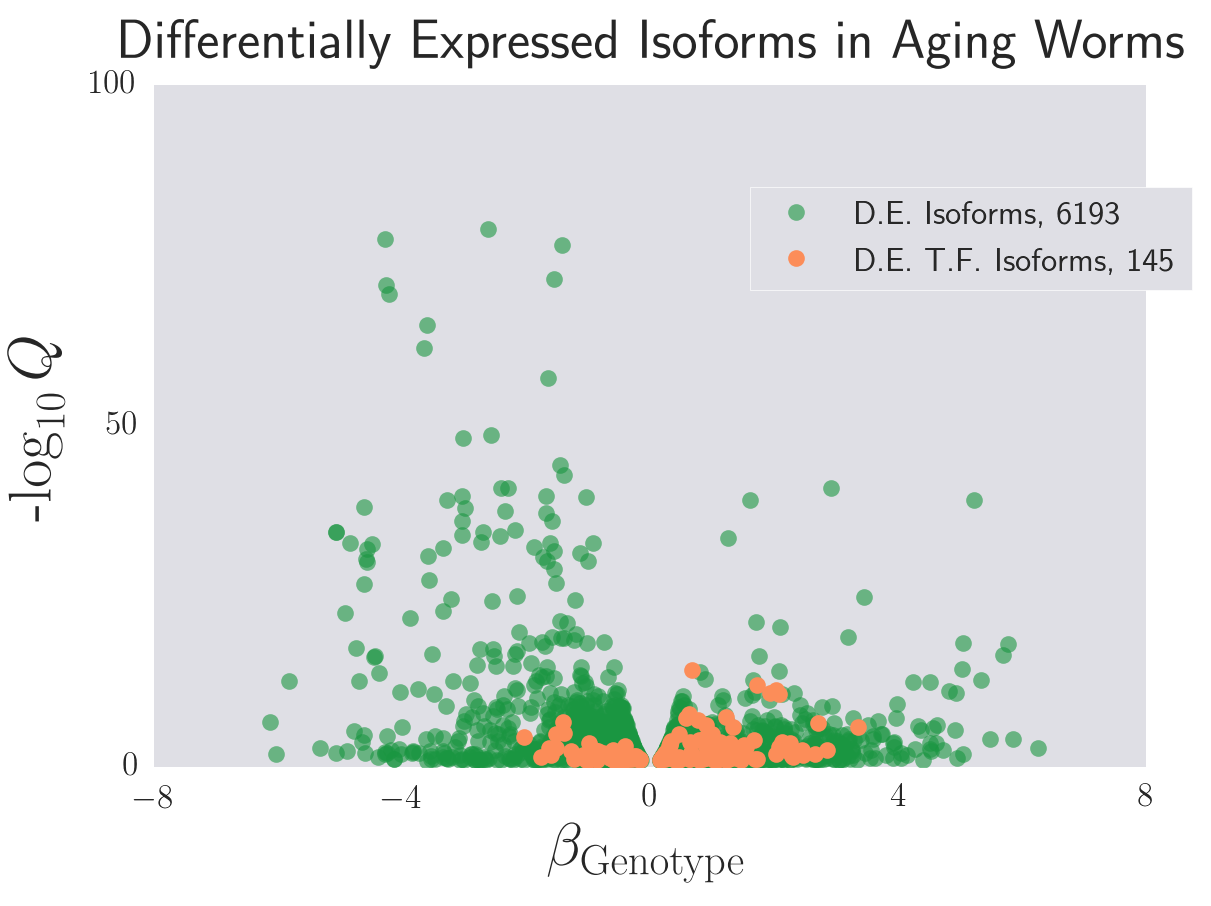

In [115]:
rc('text', usetex=True)

# plot size
ms = 6

# funcs
def selector(df):
    """A function to separate tfs from everything else"""
    sig = (df.qval < 0.1)# & (dfBetaA.b.abs() > 0.5)
    not_tf = (~df.target_id.isin(tf.target_id))
    is_tf = (df.target_id.isin(tf.target_id))
    to_plot_not = df[sig & not_tf]
    to_plot_yes = df[sig & is_tf]
    return to_plot_not, to_plot_yes

def downsampler(df, threshold=10**-10, frac=0.30):
    """A function to downsample a dataframe"""
    if (frac < 0) or (frac > 1):
        raise ValueError('frac must be between 0 and 1')
    df = df[df.qval > threshold]
    select = np.int(np.floor(df.shape[0]*frac))
    downsampled = df.sample(select)
    return downsampled

# downsampling threshold
threshold = 10**-30

# figure out where the TFs are
to_plot_not, to_plot_yes = selector(dfBetaA)
# figure out what to downsample
to_plot_not_downsampled = downsampler(to_plot_not, threshold)

# plot everything not a TF and above a certain -logq value
plt.plot(to_plot_not[to_plot_not.qval < threshold].b,
         -to_plot_not[to_plot_not.qval < threshold].qval.apply(np.log10), 'o',
         color='#1a9641', alpha=.6, ms=ms,
         label='D.E. Isoforms, {0}'.format(to_plot_not.shape[0]),)

# plot tfs
plt.plot(to_plot_yes.b, -to_plot_yes.qval.apply(np.log10), 'o',
         color='#fc8d59', ms=ms, label='D.E. T.F. Isoforms, {0}'.format(to_plot_yes.shape[0]))

# plot the legend so that you don't get multiple labels
plt.legend(loc=(0.6,.7), frameon=True, fontsize=12).set_path_effects([path_effects.Normal()])

# plot downsampled points that are below the downsampling sig. threshold
# and set zorder to 0 so they are behind everything else
plt.plot(to_plot_not_downsampled.b, -to_plot_not_downsampled.qval.apply(np.log10), 'o',
         color='#1a9641', alpha=0.6, ms=ms, zorder=0)

plt.xticks([-8, -4, 0, 4, 8], fontsize=12)
plt.yticks([0, 50, 100], fontsize=12)
plt.xlabel(r'\beta_\mathrm{Genotype}').set_path_effects([path_effects.Normal()])
plt.ylabel(r'-\log_{10}{Q}').set_path_effects([path_effects.Normal()])
plt.title('Differentially Expressed Isoforms in Aging Worms',
          y=1.02).set_path_effects([path_effects.Normal()])

plt.savefig(output_aging + 'volcano_plot_aging.svg', transparent=False, bbox_inches='tight')

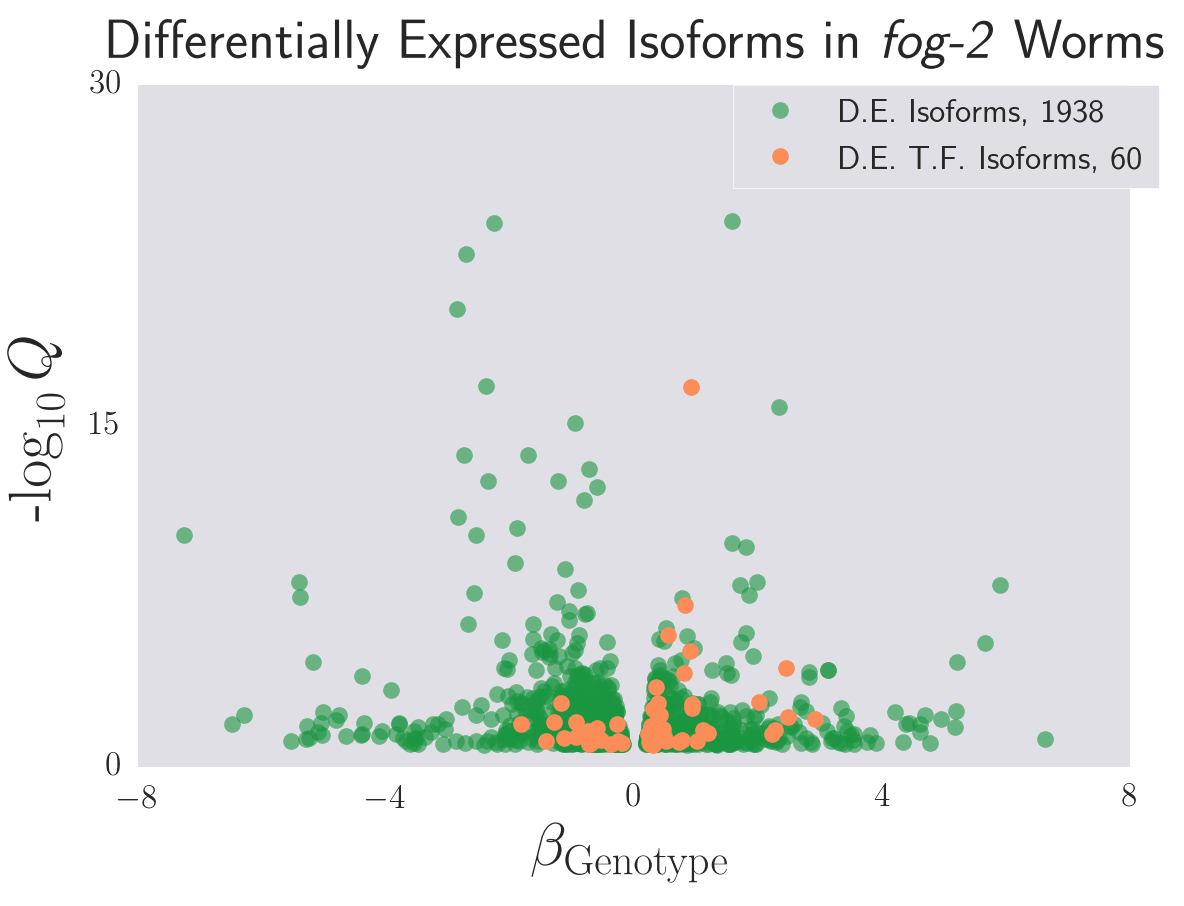

In [116]:
to_plot_not, to_plot_yes = selector(dfBetaG)
threshold=10**-20

to_plot_not_downsampled = downsampler(to_plot_not, threshold, frac=0.60)

# plot everything not a TF and above a certain -logq value
plt.plot(to_plot_not[to_plot_not.qval < threshold].b,
         -to_plot_not[to_plot_not.qval < threshold].qval.apply(np.log10), 'o',
         color='#1a9641', alpha=0.6, ms=ms,
         label='D.E. Isoforms, {0}'.format(to_plot_not.shape[0]))

# plot tfs
plt.plot(to_plot_yes.b, -to_plot_yes.qval.apply(np.log10), 'o',
         color='#fc8d59', ms=ms, label='D.E. T.F. Isoforms, {0}'.format(to_plot_yes.shape[0]))

# plot the legend so that you don't get multiple labels
plt.legend(loc=(0.6,.85), frameon=True, fontsize=12).set_path_effects([path_effects.Normal()])

# plot downsampled points that are below the downsampling sig. threshold
# and set zorder to 0 so they are behind everything else
plt.plot(to_plot_not_downsampled.b, -to_plot_not_downsampled.qval.apply(np.log10), 'o',
         color='#1a9641', alpha=0.6, ms=ms, zorder=0)


plt.xticks([-8, -4, 0, 4, 8], fontsize=12)
plt.yticks([0, 15, 30], fontsize=12)
plt.xlabel(r'\beta_\mathrm{Genotype}').set_path_effects([path_effects.Normal()])
plt.ylabel(r'-\log_{10}{Q}').set_path_effects([path_effects.Normal()])
plt.title(r'Differentially Expressed Isoforms in \emph{fog-2} Worms',
          y=1.02).set_path_effects([path_effects.Normal()])

plt.savefig(output_genotype + 'volcano_plot_genotype.svg', transparent=False)

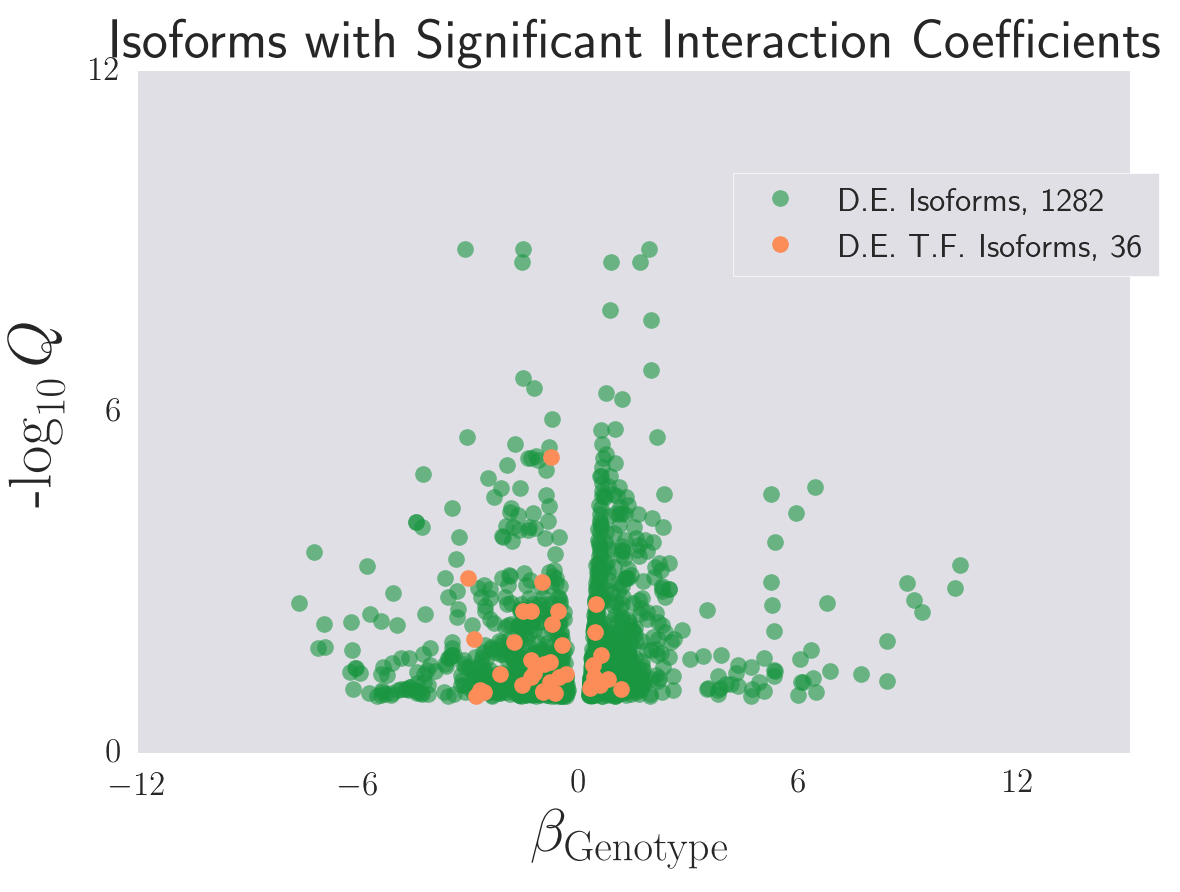

In [117]:
title = r'Isoforms with Significant Interaction Coefficients'

# make temporary dataframes to plot
to_plot_not, to_plot_yes = selector(dfBetaAG)

# plot everything not a TF
plt.plot(to_plot_not.b, -to_plot_not.qval.apply(np.log10), 'o',
         color='#1a9641', alpha=0.6, ms=ms,
         label='D.E. Isoforms, {0}'.format(to_plot_not.shape[0]))

# plot TF
plt.plot(to_plot_yes.b, -to_plot_yes.qval.apply(np.log10), 'o',
         color='#fc8d59', ms=ms,
         label='D.E. T.F. Isoforms, {0}'.format(to_plot_yes.shape[0]))

#axes
plt.xticks([-12, -6, 0, 6, 12], fontsize=12)
plt.yticks([0, 6, 12], fontsize=12)
plt.xlabel(r'\beta_\mathrm{Genotype}').set_path_effects([path_effects.Normal()])
plt.ylabel(r'-\log_{10}{Q}').set_path_effects([path_effects.Normal()])
plt.title(title).set_path_effects([path_effects.Normal()])

plt.legend(loc=(0.6,.7), frameon=True, fontsize=12)

# Identifying Transcription Factors Involved

In [22]:
# Aging Transcription Factors
ind1 = (dfBetaA.qval < qval)
ind2 = (dfBetaA.target_id.isin(tf.target_id))
inds = ind1 & ind2
x = dfBetaA[inds].sort_values('qval')
print(x.shape)
x.to_csv('../output/tf_aging.csv')

(145, 15)


In [23]:
# Genotype Transcription Factors
ind1 = (dfBetaG.qval < qval)
ind2 = (dfBetaG.target_id.isin(tf.target_id))
inds = ind1 & ind2
y = dfBetaG[inds].sort_values('qval')
print(y.shape)
y.to_csv('../output/tf_genotype.csv')

(60, 15)


In [24]:
# INteraction Transcription Factors
ind1 = (dfBetaAG.qval < qval)
ind2 = (dfBetaAG.target_id.isin(tf.target_id))
inds = ind1 & ind2
z = dfBetaAG[inds].sort_values('qval')
print(z.shape)

(36, 15)


## TEA for TFs

In [28]:
# print('Aging Results:')
resA = tea.enrichment_analysis(x.ens_gene, tissue_df, show=False)
# print('\n-------------\nGenotype Results:')
resG = tea.enrichment_analysis(y.ens_gene, tissue_df, show=False)
# print('\n-------------\nAging::Genotype Results:')
resAG = tea.enrichment_analysis(z.ens_gene, tissue_df, show=False)

l = len('WBbt:0005829')
resA.Tissue = resA.Tissue.map(lambda x: str(x)[:-l-1])
resG.Tissue = resG.Tissue.map(lambda x: str(x)[:-l-1])
resAG.Tissue = resAG.Tissue.map(lambda x: str(x)[:-l-1])
resA[(resA.Expected > 1)  &
     (resA.Observed > 2)][['Tissue', 'Expected', 'Observed', 'Q value']]

,Tissue,Expected,Observed,Q value
13,ABarpaaa,1.112077,9,0.000016
232,Cppa,1.161503,9,0.000017
129,P11,1.433344,9,0.000060
146,Cpapa,1.112077,8,0.000060
186,ABalppaa,1.037939,7,0.000095
144,ABprappp,1.062652,7,0.000109
142,Caaap,1.087365,7,0.000125
10,Cpapp,1.161503,7,0.000162
50,Capa,1.013226,6,0.000292
253,ABplaaapa,1.037939,6,0.000337


In [26]:
resG[(resG.Expected > 1)  & (resG.Observed > 2)][['Tissue', 'Expected', 'Observed', 'Q value']]

,Tissue,Expected,Observed,Q value
198,head muscle,2.496513,6,0.030991


In [27]:
resAG[(resAG.Expected > 1)  & (resAG.Observed > 2)][['Tissue', 'Expected', 'Observed', 'Q value']]

,Tissue,Expected,Observed,Q value


# Overlap between datasets

In [29]:
# reindex the dataframes
dfBetaA.sort_values('target_id', inplace=True)
dfBetaA.reset_index(inplace=True)
dfBetaG.sort_values('target_id', inplace=True)
dfBetaG.reset_index(inplace=True)
dfBetaAG.sort_values('target_id', inplace=True)
dfBetaAG.reset_index(inplace=True)

ind1 = (dfBetaA.qval < 0.1)
ind2 = (dfBetaG.qval < 0.1)
intersect = dfBetaA[ind1 & ind2]

In [30]:
intersect.ens_gene.unique().shape

(1040,)

In [31]:
dfBetaG[ind2].ens_gene.unique().shape

(1881,)

In [32]:
dfBetaA[ind1].ens_gene.unique().shape

(5592,)

In [33]:
ind3 = dfBetaA.b*dfBetaG.b > 0
ind4 = dfBetaAG.qval < 0.1
coexpressed = dfBetaA[(ind1) & (ind2) & (ind3)]
female_state = dfBetaA[(ind1) & (ind2) & (ind3) & (ind4)]

In [34]:
print(
"""
{0} genes are coexpressed between aging and genotype trajectories.
{1} genes are coexpressed and have statistically significant interaction coefficients
""".format(coexpressed.ens_gene.unique().shape[0],
female_state.ens_gene.unique().shape[0]))


905 genes are coexpressed between aging and genotype trajectories.
429 genes are coexpressed and have statistically significant interaction coefficients



In [40]:
_ = tea.enrichment_analysis(female_state.ens_gene.unique(), tissue_df=tissue_df, show=True)

Executing script

Analysis returned no enriched tissues.


In [46]:
melted_tissues = pd.melt(tissue_df, id_vars='wbid', var_name='tissue', value_name='expressed')
melted_tissues = melted_tissues[melted_tissues.expressed == 1]

In [50]:
ind = melted_tissues.wbid.isin(female_state.ens_gene.unique())
print(
"""
""")
melted_tissues[melted_tissues.wbid.isin(female_state.ens_gene.unique())].wbid.unique().shape

(155,)

In [36]:
_ = tea.enrichment_analysis(female_state.ens_gene.unique(), tissue_df=tissue_df, show=True)


Executing script

Analysis returned no enriched tissues.


In [15]:
female_state.to_csv('../output/female_state.csv', index=False)

# Interactive Volcano Plots

In [57]:
def make_expression_axes(tooltips, title,
                          xlabel, ylabel):
    """A function to plot the bokeh single mutant comparisons."""
    # Make the hover tool
    hover = bokeh.models.HoverTool(tooltips=tooltips,
                                   names=['circles'])

    # Create figure
    p = bokeh.plotting.figure(title=title, plot_width=650, 
                              plot_height=450)

    p.xgrid.grid_line_color = 'white'
    p.ygrid.grid_line_color = 'white'
    p.xaxis.axis_label = xlabel
    p.yaxis.axis_label = ylabel

    # Add the hover tool
    p.add_tools(hover)
    return p


def add_points(p, df1, x, y, se_x, color='blue', alpha=0.2, outline=False):
    # Define colors in a dictionary to access them with
    # the key from the pandas groupby funciton.
    df = df1.copy()
    transformed_q = -df[y].apply(np.log10)
    df['transformed_q'] = transformed_q

    source1 = bokeh.models.ColumnDataSource(df)

    # Specify data source
    p.circle(x=x, y='transformed_q', size=7,
             alpha=alpha, source=source1,
             color=color, name='circles')
    if outline:
        p.circle(x=x, y='transformed_q', size=7,
                 alpha=1,
                 source=source1, color='black',
                 fill_color=None, name='outlines')

    # prettify
    p.background_fill_color = "#DFDFE5"
    p.background_fill_alpha = 0.5
    
    return p

def selector(df):
    """A function to separate tfs from everything else"""
    sig = (df.qval < 0.1)# & (dfBetaA.b.abs() > 0.5)
    not_tf = (~df.target_id.isin(tf.target_id))
    is_tf = (df.target_id.isin(tf.target_id))
    to_plot_not = df[sig & not_tf]
    to_plot_yes = df[sig & is_tf]
    return to_plot_not, to_plot_yes

## Interactive Aging Volcano Plot, Figure 2a

In [58]:
# What pops up on hover?
tooltips = [('ext_gene', '@ext_gene')]

p = make_expression_axes( tooltips, 'Aging Volcano Plot',
                         'Beta Coefficient (log-fold change)', '-log(Q)')

to_plot_not, to_plot_yes = selector(dfBetaA)

p = add_points(p, to_plot_not, 'b', 'qval', 'se_b', color='#1a9641')
p = add_points(p, to_plot_yes, 'b', 'qval', 'se_b', color='#fc8d59', alpha=0.6, outline=True)

html = file_html(p, CDN, "my plot")
HTML(html)

## Interactive Genotype Volcano Plot

In [59]:
# What pops up on hover?
tooltips = [('ext_gene', '@ext_gene')]

p = make_expression_axes( tooltips, 'Genotype Volcano Plot',
                         'Beta Coefficient (log-fold change)', '-log(Q)')

to_plot_not, to_plot_yes = selector(dfBetaG)

p = add_points(p, to_plot_not, 'b', 'qval', 'se_b', color='#1a9641')
p = add_points(p, to_plot_yes, 'b', 'qval', 'se_b', color='#fc8d59', alpha=0.6, outline=True)

html = file_html(p, CDN, "my plot")
HTML(html)

## Interactive Interaction Volcano Plot

In [60]:
# What pops up on hover?
tooltips = [('ext_gene', '@ext_gene')]

p = make_expression_axes( tooltips, 'Aging::Genotype Volcano Plot',
                         'Beta Coefficient (log-fold change)', '-log(Q)')

to_plot_not, to_plot_yes = selector(dfBetaAG)

p = add_points(p, to_plot_not, 'b', 'qval', 'se_b', color='#1a9641')
p = add_points(p, to_plot_yes, 'b', 'qval', 'se_b', color='#fc8d59', alpha=0.6, outline=True)

html = file_html(p, CDN, "my plot")
HTML(html)

In [61]:
def compare_points(p, df_1, df_2, b='b', q='qval', se_b='se_b', color='blue',
                   alpha=0.2, outline=False, threshold=50):
    """A function to plot the b values between two dataframes against each other"""
    # Define colors in a dictionary to access them with
    # the key from the pandas groupby funciton.
    df1 = df_1.copy()
    df1['b_2'] = df_2.b

    transformed_q = -df1[q].apply(np.log10)
    transformed_q[transformed_q > threshold] = threshold

    cols = [
        "#%02x%02x%02x" % (int(r), 
        int(g), int(b)) for r, g, b, _ in
        255*mpl.cm.viridis(mpl.colors.Normalize()(
                           transformed_q))
            ]

    df1['colors'] = cols

    source1 = bokeh.models.ColumnDataSource(df1)

    # Specify data source
    p.circle(x='b', y='b_2',
             color='colors',
             source=source1, size=7,
             alpha=alpha, name='circles')

    # prettify
    p.background_fill_color = "#DFDFE5"
    p.background_fill_alpha = 0.5
    
    return p

# Interactive Cross Plots

In [62]:
# sort by target_id
dfBetaA.sort_values('target_id', inplace=True)
dfBetaA.reset_index(inplace=True, drop=True)
dfBetaG.sort_values('target_id', inplace=True)
dfBetaG.reset_index(inplace=True, drop=True)
dfBetaAG.sort_values('target_id', inplace=True)
dfBetaAG.reset_index(inplace=True, drop=True)
dfLRT.sort_values('target_id', inplace=True)
dfLRT.reset_index(inplace=True, drop=True)

## Aging vs. Genotype, Interactive Figure 3a

In [63]:
indA = dfBetaA.target_id.isin(intersect.target_id)
indG = dfBetaG.target_id.isin(intersect.target_id)

# What pops up on hover?
tooltips = [('ext_gene', '@ext_gene')]

p = make_expression_axes(tooltips, 'Aging vs Genotype Volcano Plot',
                         'Beta Coefficient (Aging)', 'Beta Coefficient (Genotype)')

sig = (dfBetaA.qval < 0.1) & (dfBetaAG.qval < 0.1) & (dfBetaG.qval < 0.1)
p = compare_points(p, dfBetaA[sig], dfBetaG[sig], 'b',
                   'qval', 'se_b', color='gray', alpha=1)

html = file_html(p, CDN, "my plot")
HTML(html)

## Aging vs. Aging::Genotype, Interactive Figure 3b

In [64]:
inag = dfBetaAG[dfBetaAG.qval < 0.1].target_id
ina = dfBetaA[dfBetaA.qval < 0.1].target_id
ing = dfBetaG[dfBetaG.qval < 0.1].target_id

ind1 = (dfBetaA.target_id.isin(inag)) & (dfBetaA.qval < 0.1) & (dfBetaA.target_id.isin(ing))
ind2 = (dfBetaAG.qval < 0.1) & (dfBetaAG.target_id.isin(ina)) & (dfBetaAG.target_id.isin(ing))

to_plot_not1, to_plot_yes1 = selector(dfBetaA[ind1])
to_plot_not2, to_plot_yes2 = selector(dfBetaAG[ind2])

p = make_expression_axes( tooltips, 'Aging vs Aging::Genotype Plot',
                         'Beta Coefficient (Aging)', 'Beta Coefficient (Aging::Genotype)')

# p = rectangle(p, 10, 0.1, -10, -0.01, -10, -0.01, 0.01, 10)
p = compare_points(p, dfBetaA[sig], dfBetaAG[sig], 'b',
                   'qval', 'se_b', color='gray', alpha=0.8)

html = file_html(p, CDN, "my plot")
HTML(html)

## Genotype vs. Aging::Genotype, Interactive Figure

In [65]:
ind1 = (dfBetaG.target_id.isin(inag)) & (dfBetaG.qval < 0.1) & (dfBetaG.target_id.isin(ina))
ind2 = (dfBetaAG.qval < 0.1) & (dfBetaAG.target_id.isin(ina)) & (dfBetaAG.target_id.isin(ing))

to_plot_not1, to_plot_yes1 = selector(dfBetaG[ind1])
to_plot_not2, to_plot_yes2 = selector(dfBetaAG[ind2])

p = make_expression_axes( tooltips, 'Genotype vs Aging::Genotype Plot',
                         'Beta Coefficient (Genotype)', 'Beta Coefficient (Aging::Genotype)')

p = compare_points(p, to_plot_not1, to_plot_not2,
                   'b', 'qval', 'se_b', color='gray', alpha=0.5)
p = compare_points(p, to_plot_yes1, to_plot_yes2,
                   'b', 'qval', 'se_b', color='gray', alpha=0.7, outline=True)

html = file_html(p, CDN, "my plot")
HTML(html)

# Figure 3a, 3b

In [66]:
dfBetaA[sig].shape

(455, 16)

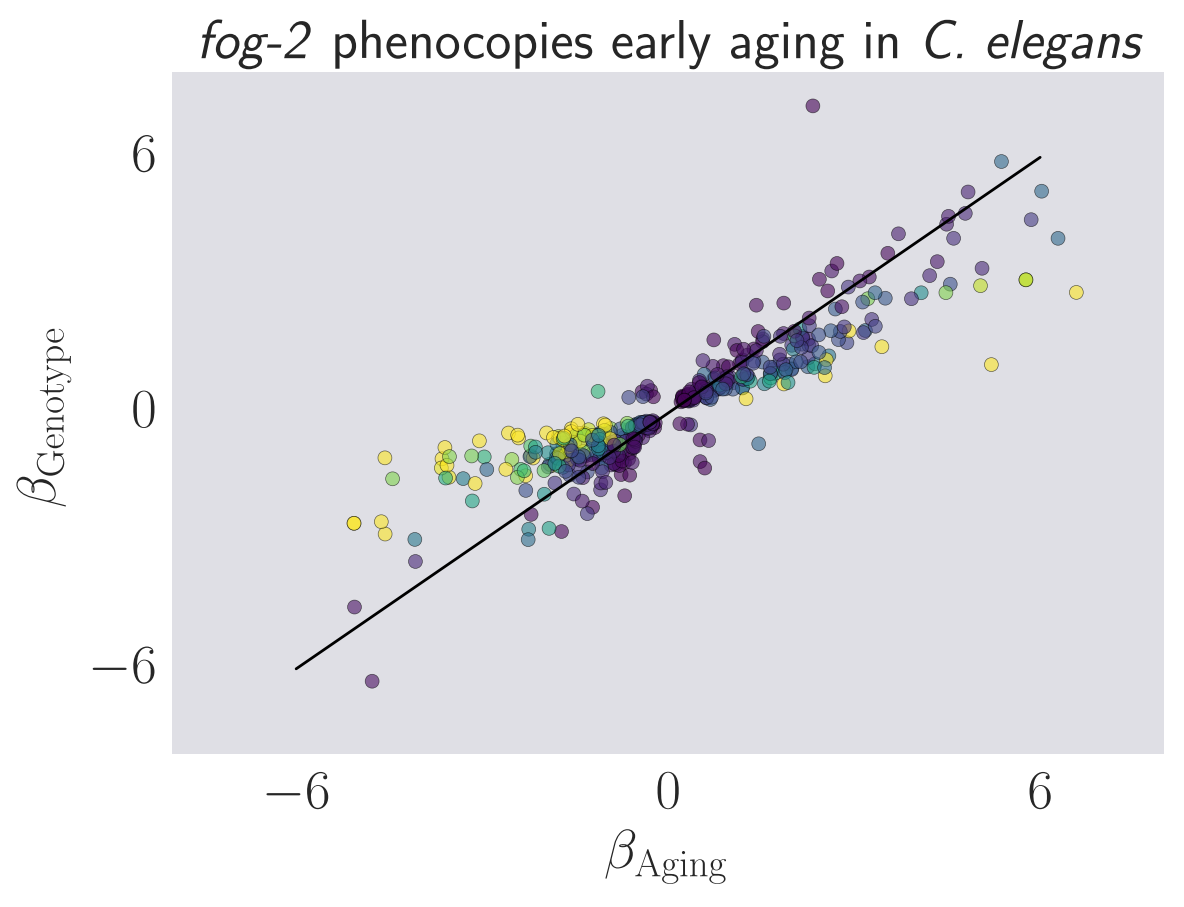

In [67]:
threshold = 20
transformed_q = -dfBetaA[sig].qval.apply(np.log10)
transformed_q[transformed_q > threshold] = threshold

cols = [
        "#%02x%02x%02x" % (int(r), 
        int(g), int(b)) for r, g, b, _ in
        255*mpl.cm.viridis(mpl.colors.Normalize()(
                           transformed_q))]

plt.scatter(dfBetaA[sig].b, dfBetaG[sig].b,
            c=transformed_q, cmap='viridis', alpha=0.6, s=25)

x = np.linspace(-6, 6)
plt.plot(x, x, 'k-', lw=1)
plt.xticks([-6, 0, 6], fontsize=20)
plt.yticks([-6, 0, 6], fontsize=20)
plt.xlabel(r'$\beta_\mathrm{Aging}$', fontsize=20).set_path_effects([path_effects.Normal()])
plt.ylabel(r'$\beta_\mathrm{Genotype}$',
           fontsize=20).set_path_effects([path_effects.Normal()])
title = r'\emph{fog-2} phenocopies early aging in \emph{C. elegans}'
plt.title(title).set_path_effects([path_effects.Normal()])

ax = plt.gca()
for i, label in enumerate(ax.get_xticklabels()):
    ax.get_xticklabels()[i].set_path_effects([path_effects.Normal()])
for i, label in enumerate(ax.get_yticklabels()):
    ax.get_yticklabels()[i].set_path_effects([path_effects.Normal()])


plt.savefig('../output/fog2phenocopiesaging.pdf', bbox_inches='tight')

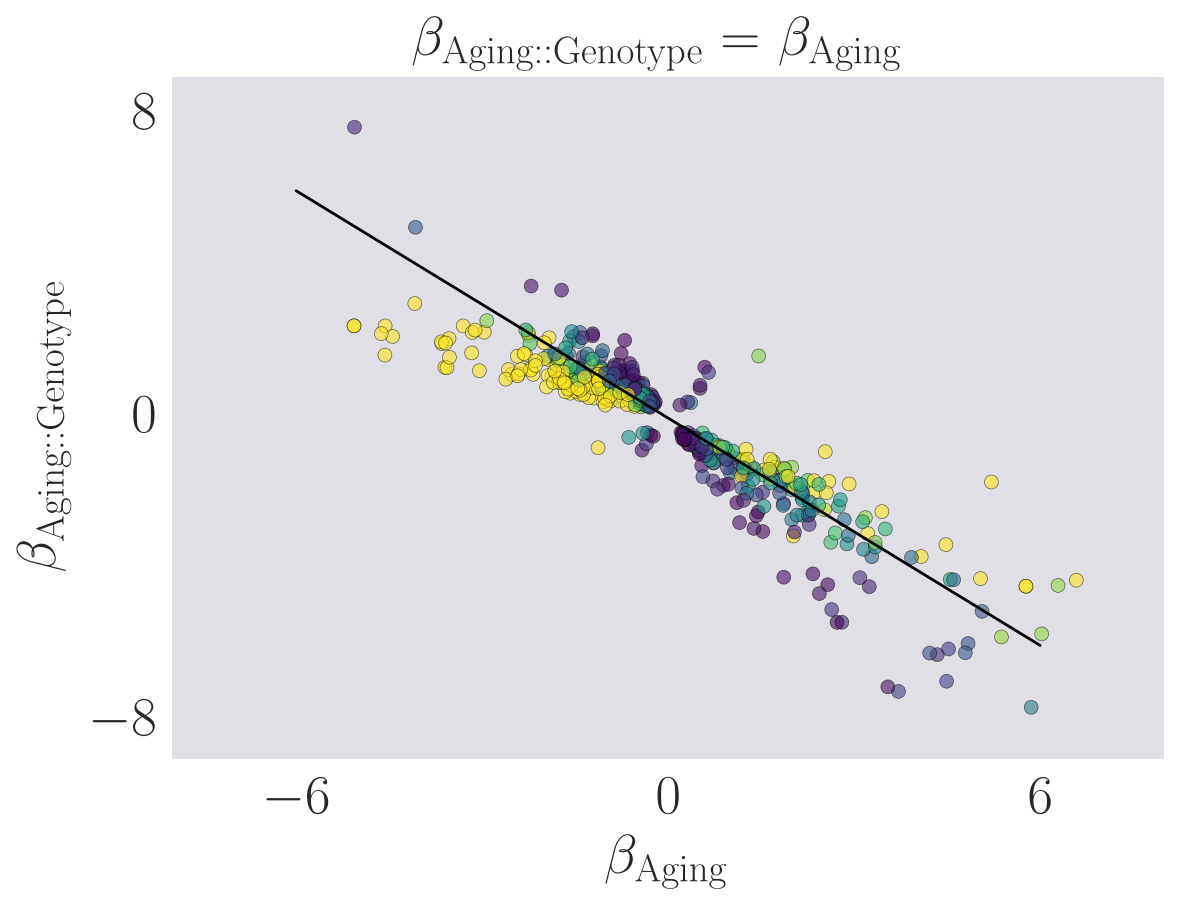

In [68]:
title = r'$\beta_\mathrm{Aging::Genotype}$ = $\beta_\mathrm{Aging}$'

threshold = 20
transformed_q = -dfBetaA[sig].qval.apply(np.log)
transformed_q[transformed_q > threshold] = threshold

cols = [
        "#%02x%02x%02x" % (int(r), 
        int(g), int(b)) for r, g, b, _ in
        255*mpl.cm.viridis(mpl.colors.Normalize()(
                           transformed_q))]

plt.scatter(dfBetaA[sig].b, dfBetaAG[sig].b,
            c=transformed_q, cmap='viridis', alpha=0.6, s=25)
x = np.linspace(-6, 6)
plt.plot(x, -x, 'k-', lw=1)
plt.xticks([-6, 0, 6], fontsize=20)
plt.ylim(-9, 9)
plt.yticks([-8, 0, 8], fontsize=20)
plt.xlabel(r'$\beta_\mathrm{Aging}$', fontsize=20).set_path_effects([path_effects.Normal()])
plt.ylabel(r'$\beta_\mathrm{Aging::Genotype}$',
           fontsize=20).set_path_effects([path_effects.Normal()])
plt.title(title).set_path_effects([path_effects.Normal()])

ax = plt.gca()
for i, label in enumerate(ax.get_xticklabels()):
    ax.get_xticklabels()[i].set_path_effects([path_effects.Normal()])
for i, label in enumerate(ax.get_yticklabels()):
    ax.get_yticklabels()[i].set_path_effects([path_effects.Normal()])

plt.savefig('../output/aginggenotype_vs_aging.pdf', bbox_inches='tight')

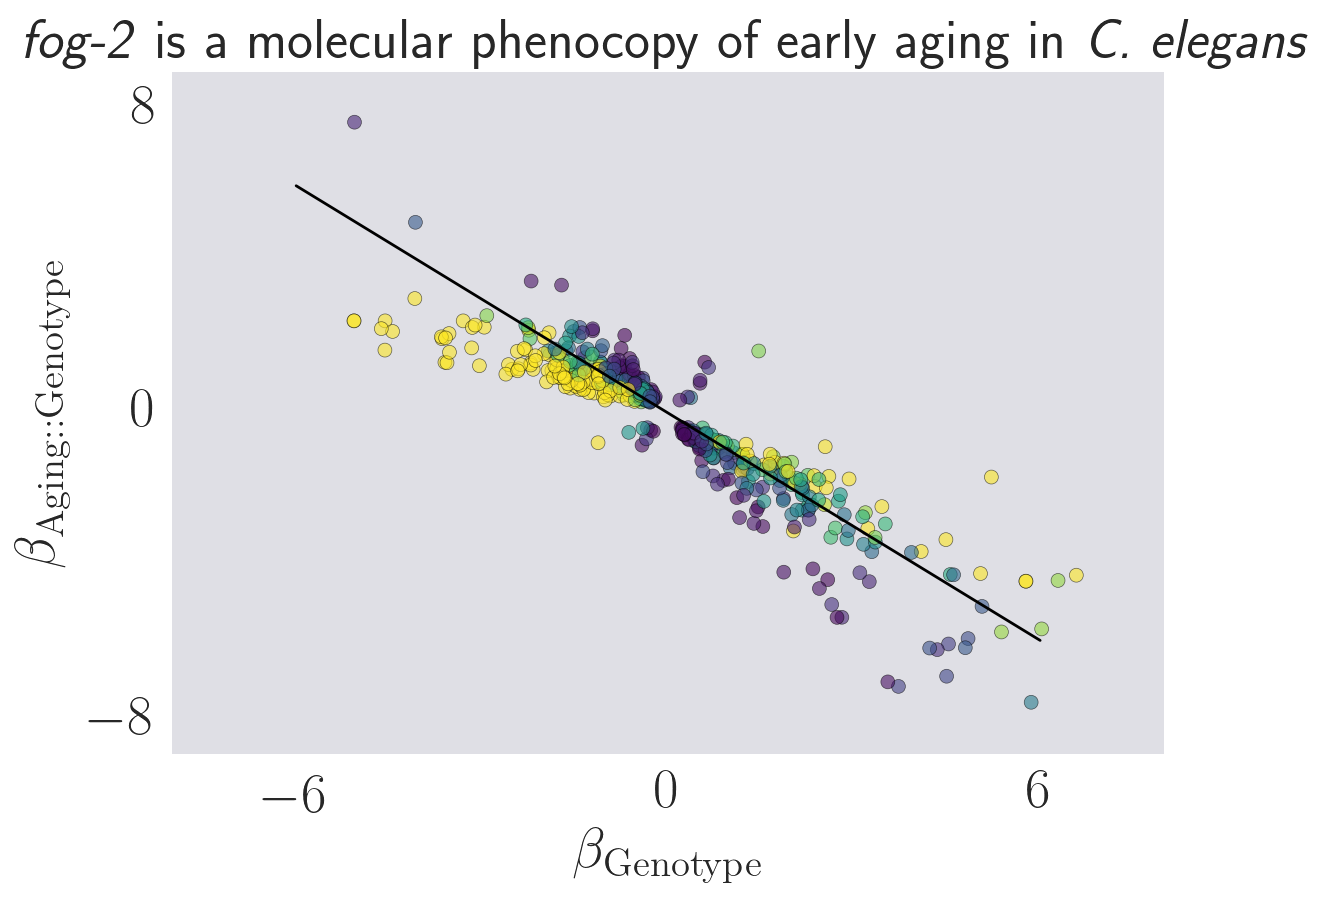

In [38]:
transformed_q = -dfBetaA[sig].qval.apply(np.log)
transformed_q[transformed_q > threshold] = threshold

plt.scatter(dfBetaA[sig].b, dfBetaAG[sig].b,
            c=transformed_q, cmap='viridis', alpha=0.6, s=25)
x = np.linspace(-6, 6)
plt.plot(x, -x, 'k-', lw=1)
plt.xticks([-6, 0, 6], fontsize=20)
plt.ylim(-9, 9)
plt.yticks([-8, 0, 8], fontsize=20)
plt.xlabel(r'$\beta_\mathrm{Genotype}$', fontsize=20)
plt.ylabel(r'$\beta_\mathrm{Aging::Genotype}$', fontsize=20)
plt.title(r'\emph{fog-2} is a molecular phenocopy of early aging in \emph{C. elegans}')
plt.savefig('../output/aginggenotype_vs_genotype.pdf', bbox_inches='tight')